In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm
import os
import distance
%matplotlib inline
sns.set(rc={'axes.facecolor':'#FFFFFF'})
sns.set_style('whitegrid')
pd.set_option('display.max_columns', 100)

In [2]:
data = {}
clean_data = {}

for f in os.listdir('/home/katya/local/HIS3InterspeciesEpistasis/Data/'):
    if 'csv' in f:
        data[f[:-16]] = pd.DataFrame.from_csv('/home/katya/local/HIS3InterspeciesEpistasis/Data/' + f, sep = '\t')
        clean_data[f[:-16]] = data[f[:-16]][(data[f[:-16]].nonsense == 0) & (data[f[:-16]].middle == 1)]

In [3]:
columns = list(clean_data['S1'].columns)

In [4]:
sqs = {}

for chunk in clean_data:
    sqs[chunk] = list(clean_data[chunk].index)

In [5]:
positions = pd.DataFrame.from_csv('/home/katya/local/HIS3InterspeciesEpistasis/Data_Small_Tables/positions.csv', sep = '\t')

In [6]:
for chunk in clean_data:
    for ind in range(len(sqs[chunk])):
        sqs[chunk][ind] = sqs[chunk][ind][:int(positions[chunk].ix['len1'])] + sqs[chunk][ind][-int(positions[chunk].ix['len2']):]

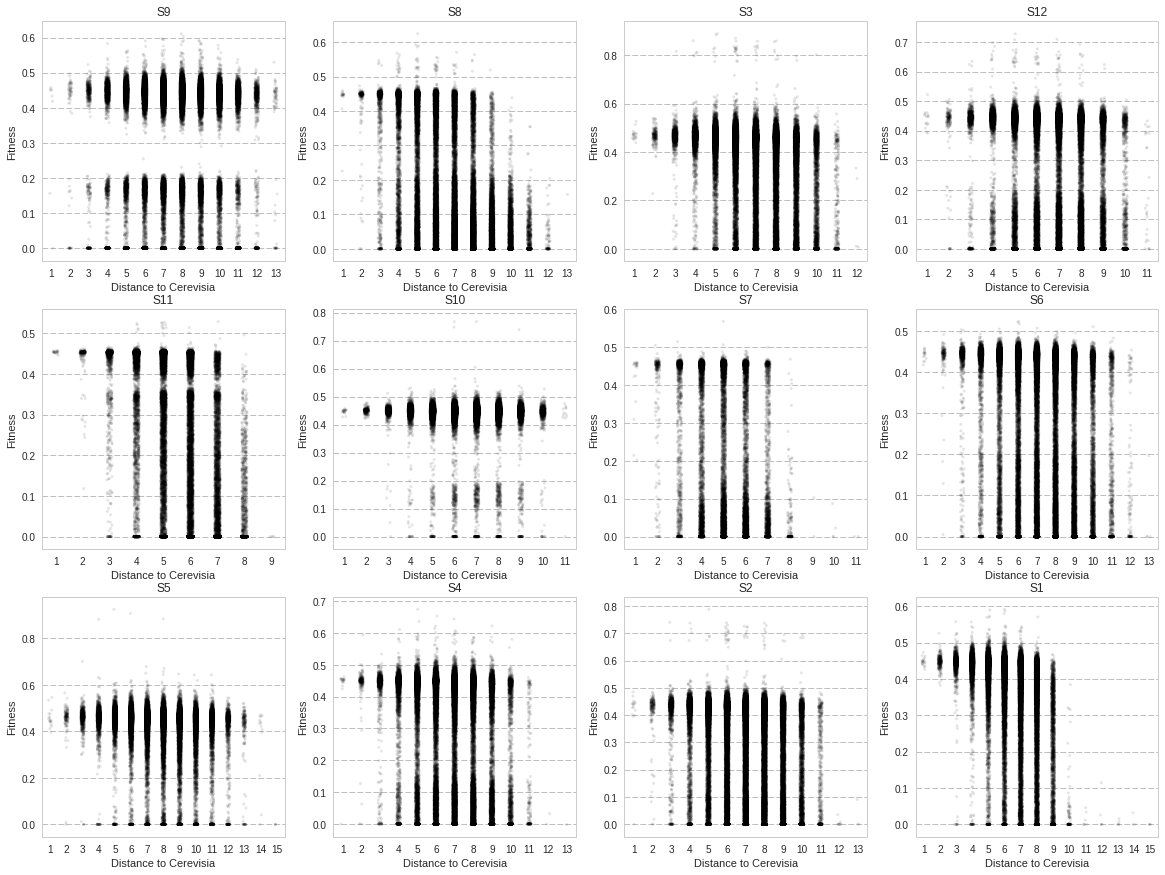

In [16]:
plt.figure(figsize=(4*5,3*5))
count=1
for chunk in clean_data.keys():
    test = pd.DataFrame(clean_data[chunk].s[(clean_data[chunk].dist_min_sp != 0)&(clean_data[chunk].dist_min_all != 0)])
    test['Cer'] = clean_data[chunk].dist_Scer[(clean_data[chunk].dist_min_sp != 0)&(clean_data[chunk].dist_min_all != 0)]
    test.reset_index(inplace=True)
    test.columns = ['aa_seq','Fitness','Cer']

    test = pd.pivot_table(test, index = ['aa_seq'], columns = ['Cer'])
    test.columns = test.columns.droplevel()

    if len(test)>0:
        plt.subplot(3,4,count)
        plt.title(chunk)
        plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
        sns.stripplot(data=test, size=3, jitter=True, alpha=0.1, color='k')
        plt.xlabel('Distance to Cerevisia')
        plt.ylabel('Fitness')
        count+=1

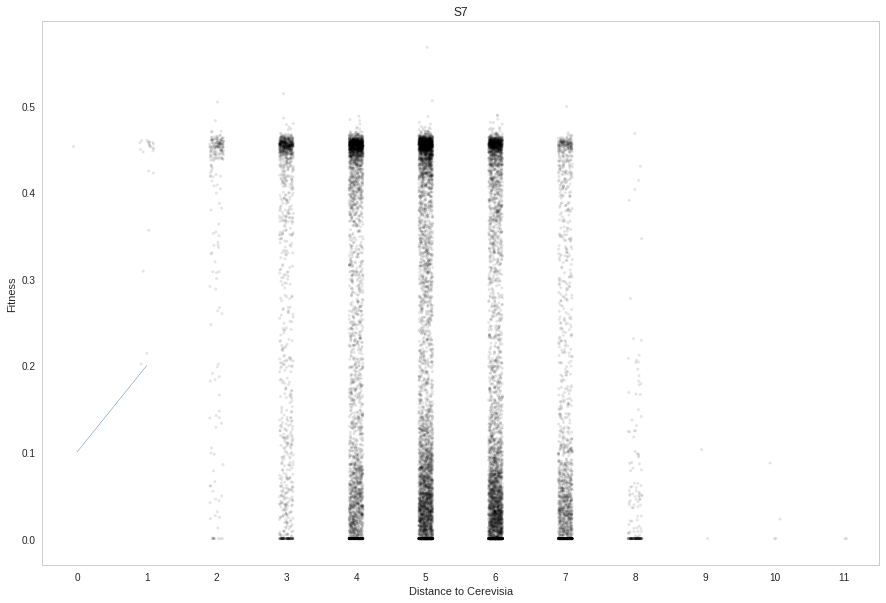

In [23]:
chunk = 'S7'

test = pd.DataFrame(clean_data[chunk].s)
test['Cer'] = clean_data[chunk].dist_Scer
test.reset_index(inplace=True)
test.columns = ['aa_seq','Fitness','Cer']

test = pd.pivot_table(test, index = ['aa_seq'], columns = ['Cer'])
test.columns = test.columns.droplevel()

plt.figure(figsize=[15,10])
plt.title(chunk)
plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='white')
sns.stripplot(data=test, size=3, jitter=True, alpha=0.1, color='k')
plt.plot([0,1],[0.1,0.2],linewidth=.4)
plt.xlabel('Distance to Cerevisia')
plt.ylabel('Fitness');

In [24]:
test

Cer,0,1,2,3,4,5,6,7,8,9,10,11
aa_seq,,,,,,,,,,,,
CHALAKHAGWSLIVECIGDLFVDDHHSSED,NaN,NaN,NaN,NaN,NaN,NaN,0.424182,NaN,NaN,NaN,NaN,NaN
CHALAKHGGWSLIVECIGDLFIDDHHSLED,NaN,NaN,NaN,NaN,NaN,0.025026,NaN,NaN,NaN,NaN,NaN,NaN
CNALAKHAGWSLIVECIGDLLVDDHHTTED,NaN,NaN,NaN,NaN,NaN,0.454736,NaN,NaN,NaN,NaN,NaN,NaN
CNALAKHCGWSLIVECIGDLFVDDHHSTED,NaN,NaN,NaN,NaN,NaN,NaN,0.322159,NaN,NaN,NaN,NaN,NaN
CNALAKHCGWSLIVECIGDLHVDDHHTVED,NaN,NaN,NaN,NaN,NaN,0.448516,NaN,NaN,NaN,NaN,NaN,NaN
CNALAKHCGWSLIVECIGDLYIDDHHSSED,NaN,NaN,NaN,NaN,NaN,NaN,0.271094,NaN,NaN,NaN,NaN,NaN
CTALAKHAGWSLIVECIGDLFIDDHHSIED,NaN,NaN,NaN,NaN,NaN,NaN,0.455952,NaN,NaN,NaN,NaN,NaN
DHALAKHCGWSLIVECIGDLVIDDHHTAED,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DHALAKHSGWSLIVECIGDLVVDDHHSIED,NaN,NaN,NaN,NaN,NaN,0.012992,NaN,NaN,NaN,NaN,NaN,NaN
